In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Baffin = pd.read_excel(filepath, sheet_name='Baffin-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Baffin)
fp.date_time(Baffin)

,Extent,Date
0,1090625.815,1979-01-01
1,1157634.866,1979-02-01
2,1299583.477,1979-03-01
3,1137194.680,1979-04-01
4,983083.453,1979-05-01
...,...,...
533,781460.891,2023-06-01
534,331845.048,2023-07-01
535,99334.625,2023-08-01
536,49359.723,2023-09-01


In [5]:
scaler = MinMaxScaler()
Baffin['Extent'] = scaler.fit_transform(Baffin['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 9
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Baffin['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((518, 12, 1), (518,))

In [8]:
X_train, y_train = X[:418], y[:418]
X_val, y_val = X[418:470], y[418:470]
X_test, y_test = X[470:], y[470:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Baffin_model_LT9/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
50/53 [===========================>..] - ETA: 0s - loss: 0.2103 - root_mean_squared_error: 0.4585

INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


53/53 [==============================] - 6s 80ms/step - loss: 0.2092 - root_mean_squared_error: 0.4573 - val_loss: 0.1534 - val_root_mean_squared_error: 0.3916
Epoch 2/50
45/53 [========================>.....] - ETA: 0s - loss: 0.1544 - root_mean_squared_error: 0.3930

INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


53/53 [==============================] - 3s 55ms/step - loss: 0.1528 - root_mean_squared_error: 0.3910 - val_loss: 0.1394 - val_root_mean_squared_error: 0.3733
Epoch 3/50
51/53 [===========================>..] - ETA: 0s - loss: 0.1148 - root_mean_squared_error: 0.3388

INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


53/53 [==============================] - 3s 60ms/step - loss: 0.1141 - root_mean_squared_error: 0.3378 - val_loss: 0.1195 - val_root_mean_squared_error: 0.3457
Epoch 4/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0969 - root_mean_squared_error: 0.3113

INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


53/53 [==============================] - 3s 65ms/step - loss: 0.0917 - root_mean_squared_error: 0.3028 - val_loss: 0.1035 - val_root_mean_squared_error: 0.3218
Epoch 5/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0678 - root_mean_squared_error: 0.2605

INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


53/53 [==============================] - 3s 54ms/step - loss: 0.0701 - root_mean_squared_error: 0.2647 - val_loss: 0.0877 - val_root_mean_squared_error: 0.2961
Epoch 6/50
43/53 [=======================>......] - ETA: 0s - loss: 0.0604 - root_mean_squared_error: 0.2458

INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


53/53 [==============================] - 3s 59ms/step - loss: 0.0558 - root_mean_squared_error: 0.2363 - val_loss: 0.0732 - val_root_mean_squared_error: 0.2705
Epoch 7/50
52/53 [============================>.] - ETA: 0s - loss: 0.0435 - root_mean_squared_error: 0.2085

INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


53/53 [==============================] - 3s 65ms/step - loss: 0.0433 - root_mean_squared_error: 0.2080 - val_loss: 0.0594 - val_root_mean_squared_error: 0.2436
Epoch 8/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0307 - root_mean_squared_error: 0.1753

INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


53/53 [==============================] - 3s 57ms/step - loss: 0.0319 - root_mean_squared_error: 0.1785 - val_loss: 0.0429 - val_root_mean_squared_error: 0.2072
Epoch 9/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0257 - root_mean_squared_error: 0.1603

INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


53/53 [==============================] - 3s 63ms/step - loss: 0.0252 - root_mean_squared_error: 0.1587 - val_loss: 0.0351 - val_root_mean_squared_error: 0.1873
Epoch 10/50
53/53 [==============================] - ETA: 0s - loss: 0.0212 - root_mean_squared_error: 0.1455

INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


53/53 [==============================] - 3s 51ms/step - loss: 0.0212 - root_mean_squared_error: 0.1455 - val_loss: 0.0249 - val_root_mean_squared_error: 0.1579
Epoch 11/50
53/53 [==============================] - ETA: 0s - loss: 0.0184 - root_mean_squared_error: 0.1358

INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


53/53 [==============================] - 3s 53ms/step - loss: 0.0184 - root_mean_squared_error: 0.1358 - val_loss: 0.0149 - val_root_mean_squared_error: 0.1221
Epoch 12/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0175 - root_mean_squared_error: 0.1323

INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


53/53 [==============================] - 3s 63ms/step - loss: 0.0172 - root_mean_squared_error: 0.1313 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1074
Epoch 13/50
43/53 [=======================>......] - ETA: 0s - loss: 0.0141 - root_mean_squared_error: 0.1187

INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


53/53 [==============================] - 3s 59ms/step - loss: 0.0147 - root_mean_squared_error: 0.1214 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0969
Epoch 14/50
52/53 [============================>.] - ETA: 0s - loss: 0.0131 - root_mean_squared_error: 0.1142

INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


53/53 [==============================] - 3s 55ms/step - loss: 0.0131 - root_mean_squared_error: 0.1143 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0623
Epoch 15/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0114 - root_mean_squared_error: 0.1068

INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


53/53 [==============================] - 3s 63ms/step - loss: 0.0123 - root_mean_squared_error: 0.1110 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0557
Epoch 16/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0113 - root_mean_squared_error: 0.1062 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0625
Epoch 17/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0143 - root_mean_squared_error: 0.1196

INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


53/53 [==============================] - 3s 48ms/step - loss: 0.0142 - root_mean_squared_error: 0.1192 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0525
Epoch 18/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0101 - root_mean_squared_error: 0.1007 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0557
Epoch 19/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0165 - root_mean_squared_error: 0.1286 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0562
Epoch 20/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0116 - root_mean_squared_error: 0.1079 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0537
Epoch 21/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0138 - root_mean_squared_error: 0.1175 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0532
Epoch 22/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0143 - root_mean_squared_error: 0.1195 - val_loss: 0.0035 - val_root_mean_squared

INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


INFO:tensorflow:Assets written to: Baffin_model_LT9\assets


53/53 [==============================] - 3s 65ms/step - loss: 0.0170 - root_mean_squared_error: 0.1304 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0522
Epoch 46/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0121 - root_mean_squared_error: 0.1098 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0546
Epoch 47/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0142 - root_mean_squared_error: 0.1193 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0559
Epoch 48/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0142 - root_mean_squared_error: 0.1191 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0533
Epoch 49/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0139 - root_mean_squared_error: 0.1179 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0525
Epoch 50/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0157 - root_mean_squared_error: 0.1251 - val_loss: 0.0038 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.0905215581258139 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

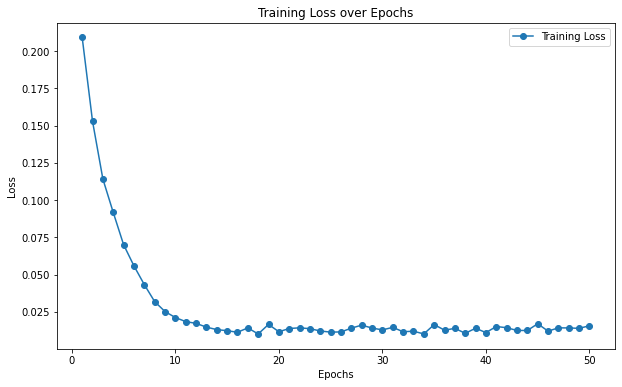

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

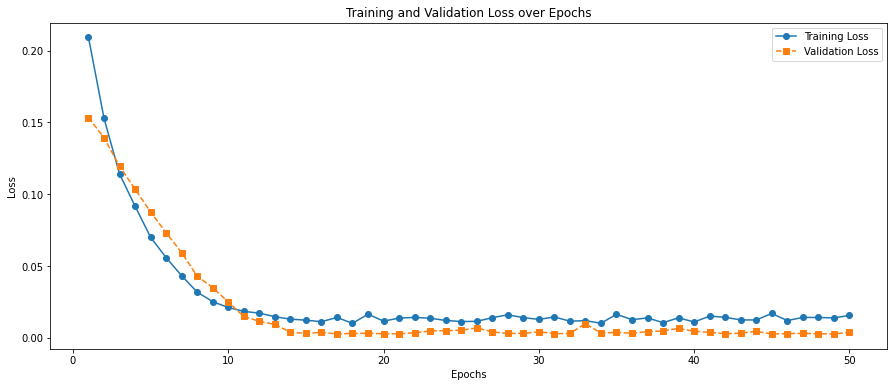

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

Test Predictions

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Baffin_model_LT9/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 11ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

RMSE : 0.05817659384610611


In [19]:
mae = mean_absolute_error(y_test, test_predictions)
print(mae)

0.04395973575939582


In [20]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

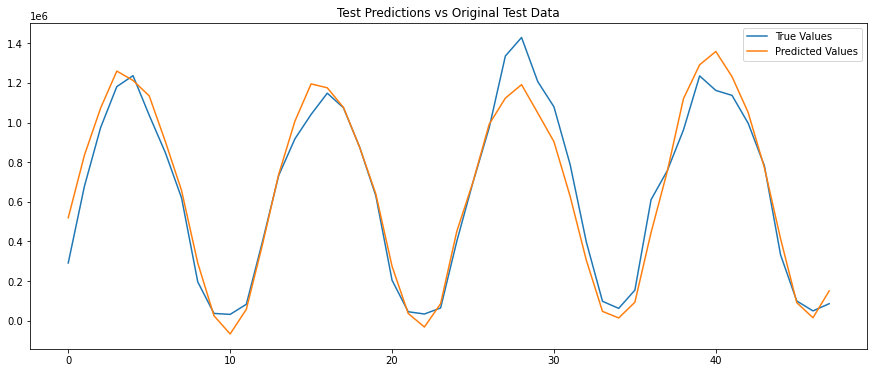

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

Prediction on whole dataset

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [23]:
mse = mean_squared_error(y, predictions)
print(mse)

0.0038626381848272514


In [24]:
mae = mean_absolute_error(y, predictions)
print(mae)

0.046662474897839035


In [25]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

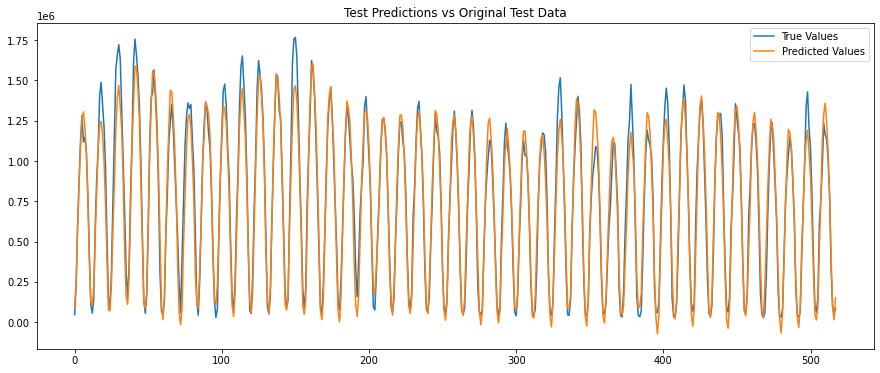

In [26]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()